In [1]:
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

Importing Data Set

In [2]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


Checking For Missing Values

In [4]:
train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

Data Preperation

In [5]:
train['gender'].replace('Female',0,inplace=True)
train['gender'].replace('Male',1,inplace=True)
train['area'].replace('Urban',0,inplace=True)
train['area'].replace('Rural',1,inplace=True)
train['qualification'].replace('Bachelor',1,inplace=True)
train['qualification'].replace('High School',2,inplace=True)
train['qualification'].replace('Others',3,inplace=True)
train['num_policies'].replace('1',0,inplace=True)
train['num_policies'].replace('More than 1',1,inplace=True)
train['policy'].replace('A',1,inplace=True)
train['policy'].replace('B',2,inplace=True)
train['policy'].replace('C',3,inplace=True)
train['type_of_policy'].replace('Platinum',1,inplace=True)
train['type_of_policy'].replace('Silver',1,inplace=True)
train['type_of_policy'].replace('Gold',1,inplace=True)
train=train.drop(['income'],axis=1)

In [6]:
train.head()

,id,gender,area,qualification,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,0,1,1,5,5790,1,1,1,64308
1,2,1,1,2,0,8,5080,1,1,1,515400
2,3,1,0,1,1,8,2599,1,1,1,64212
3,4,0,1,2,0,7,0,1,1,1,97920
4,5,1,0,2,1,6,3508,1,1,1,59736


In [7]:
X = train.drop(['cltv'],axis=1)
y = train['cltv']
X.head()

,id,gender,area,qualification,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1,1,0,1,1,5,5790,1,1,1
1,2,1,1,2,0,8,5080,1,1,1
2,3,1,0,1,1,8,2599,1,1,1
3,4,0,1,2,0,7,0,1,1,1
4,5,1,0,2,1,6,3508,1,1,1


In [8]:
# VIF dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature        VIF
0              id   1.000076
1          gender   1.014159
2            area   1.266713
3   qualification   1.005804
4  marital_status   1.024230
5         vintage   1.005352
6    claim_amount   1.293832
7    num_policies   1.041888
8          policy   1.019256
9  type_of_policy  30.371608


In [9]:
X=X.drop(['type_of_policy'],axis=1)

In [10]:
# VIF dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature       VIF
0              id  3.598483
1          gender  2.230311
2            area  1.695641
3   qualification  6.318012
4  marital_status  2.246609
5         vintage  4.447072
6    claim_amount  3.212301
7    num_policies  2.950004
8          policy  5.062924


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

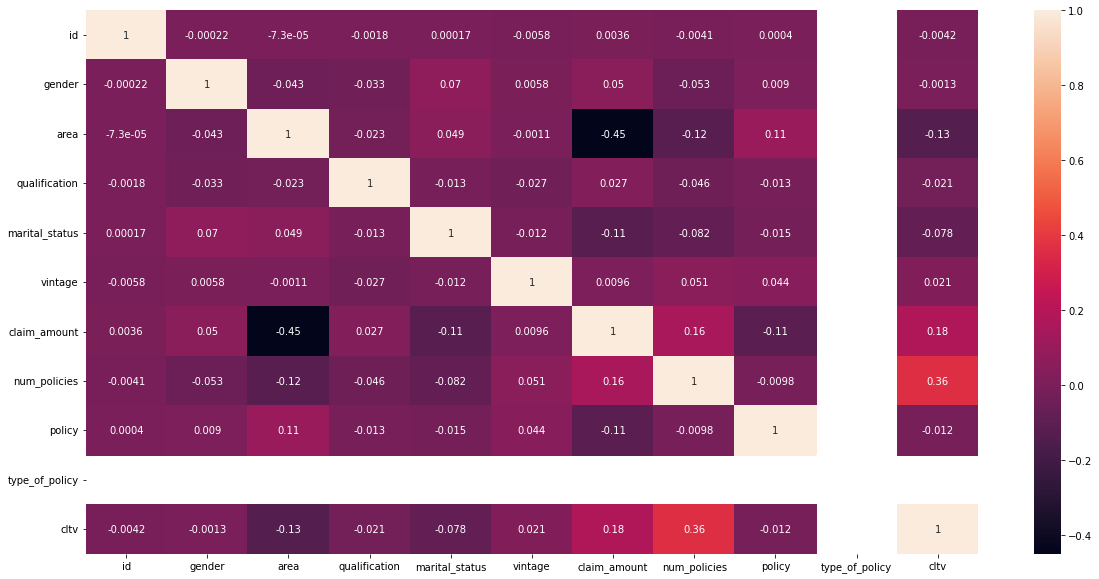

In [12]:
plt.figure(figsize = (20,10))        
sns.heatmap(train.corr(),annot = True)
plt.show()

In [13]:
log = LinearRegression()

In [14]:
log.fit(X,y)

LinearRegression()

In [15]:
yhat = log.predict(X)

In [16]:
r2_score(y, yhat)

0.14877779841400618

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=100)

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred=model.predict(X_train)
y_pred

array([133562.58342182, 107152.07502349, 117771.76466374, ...,
       130079.92361223, 113313.0170105 ,  39381.27196444])

In [20]:
r2_score(y_train,y_pred)

0.1503811871002908

In [21]:
y_pred=model.predict(X_test)
y_pred

array([131143.67309908,  38456.42034693, 122205.15014921, ...,
        53460.41946313, 112238.89258096, 109090.68381433])

In [22]:
r2_score(y_test,y_pred)

0.14616396907835283

Test Data

In [23]:
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [24]:
test['gender'].replace('Female',0,inplace=True)
test['gender'].replace('Male',1,inplace=True)
test['area'].replace('Urban',0,inplace=True)
test['area'].replace('Rural',1,inplace=True)
test['qualification'].replace('Bachelor',1,inplace=True)
test['qualification'].replace('High School',2,inplace=True)
test['qualification'].replace('Others',3,inplace=True)
test['num_policies'].replace('1',0,inplace=True)
test['num_policies'].replace('More than 1',1,inplace=True)
test['policy'].replace('A',1,inplace=True)
test['policy'].replace('B',2,inplace=True)
test['policy'].replace('C',3,inplace=True)
test['type_of_policy'].replace('Platinum',1,inplace=True)
test['type_of_policy'].replace('Silver',1,inplace=True)
test['type_of_policy'].replace('Gold',1,inplace=True)
test=test.drop(['income'],axis=1)
test=test.drop(['type_of_policy'],axis=1)

In [25]:
test.head()

,id,gender,area,qualification,marital_status,vintage,claim_amount,num_policies,policy
0,89393,0,1,2,0,6,2134,1,2
1,89394,0,0,2,0,4,4102,1,1
2,89395,1,1,2,1,7,2925,1,2
3,89396,0,1,1,1,2,0,1,2
4,89397,0,0,2,0,5,14059,1,2


In [26]:
y_pred_linear_pred=model.predict(test)

In [27]:
test['cltv_linear_reg']= y_pred_linear_pred

In [28]:
test=test.drop(['gender','area','qualification','marital_status','vintage','claim_amount','num_policies','policy'],axis=1)

In [29]:
test.head()

,id,cltv_linear_reg
0,89393,108479.086718
1,89394,121932.867247
2,89395,106407.936995
3,89396,95810.344205
4,89397,151503.850261


In [31]:
test.to_csv("sample_submission.csv",index=False)